# Machine Learning for Genre Classification
## Part II: Model Building
### Tom Earnest

## Loading the Dataset

We will start by importing some of the needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pprint

# import plotly.plotly as py
# import plotly.graph_objs as go

In [2]:
# plotly.tools.set_credentials_file(username='earnestt1234', api_key='sVfOUa8lAiJrtFtK8ACq')

And setting the working directory with our dataset:

In [3]:
cd "E:/Songlearning/"

E:\Songlearning


Loading the dataset.  The `.csv` file was built with an empty first column; we will drop it and then save the file.

In [4]:
songs = pd.read_csv('songs.csv')
songs = songs.drop('Unnamed: 0', axis = 1)
songs

,song,genre,duration,tempo,tempo_changes,tempo_confidence,sub_strength,bass_strength,lomid_strength,mid_strength,...,spectral_centroid,spectral_bandwidth,band 0_contrast,band 1_contrast,band 2_contrast,band 3_contrast,mean_flatness,peak_flatness,rolloff(0.5),tuning
0,2-18 Adagio In G Minor.wav,classical,403.560000,123.046875,0.840046,0.437745,-69.937752,-46.466240,-46.362034,-59.902027,...,1229.354154,1369.216170,28.187134,21.646552,25.890673,48.481068,0.011589,0.010380,749.916100,0.14
1,"1-22 Symphony No. 94 In G Major, Hob.wav",classical,183.805125,112.347147,0.631632,0.449975,-56.923286,-45.887459,-45.843201,-55.359638,...,1636.966577,1768.998819,23.412409,18.339226,22.748773,44.080071,0.006729,0.058556,1026.586482,0.43
2,2-47 3 Gymnopédies_ Gymnopedie No.3.wav,classical,136.942222,95.703125,1.169888,0.175144,-48.284836,-35.853439,-40.226242,-65.640259,...,458.532285,813.800946,26.596392,18.781046,24.571072,42.218725,0.011041,0.000270,288.394503,0.04
3,1-48 Symphony No. 5 In C Sharp Minor.wav,classical,724.212154,123.046875,0.670087,0.515229,-41.229824,-48.095158,-49.479107,-60.458160,...,1456.766831,1750.424010,17.313058,19.639970,24.059596,42.004957,0.002411,0.026788,777.938569,0.05
4,2-21 Symphonies de Fanfares_ Rondeau.wav,classical,110.666304,161.499023,0.524439,0.678414,-54.417900,-39.528473,-38.383759,-42.102161,...,2234.155823,2030.182088,20.525741,17.798760,19.997354,44.733609,0.012057,0.081753,1601.077445,0.06
5,2-28 Symphonie Espagnole In D Minor.wav,classical,484.124444,112.347147,0.839329,0.331271,-64.188072,-47.335423,-43.888500,-52.731331,...,1746.411733,1896.470036,23.537399,17.524957,21.115912,43.315789,0.003571,0.067342,1044.307680,0.14
6,2-34 Sylvia_ Procession of Bacchus.wav,classical,355.770340,117.453835,0.672236,0.379846,-48.333992,-37.657970,-38.863781,-46.931847,...,1823.841786,1894.797800,21.101600,15.079932,19.414412,42.885857,0.011397,0.155777,1155.288250,0.16
7,2-46 The Sorcerer's Apprentice.wav,classical,692.511927,117.453835,0.694049,0.240872,-61.627472,-49.717087,-47.314827,-56.784119,...,2045.870499,2154.334101,20.436364,15.248713,20.102135,40.411367,0.010696,0.138994,1247.654366,0.07
8,"1-12 Solomon, HWV 67 (arr. for Organ.wav",classical,193.480272,117.453835,0.528021,0.557422,-40.538418,-37.200577,-38.816086,-50.267883,...,1244.083831,1435.215733,18.858562,17.460832,24.786223,47.497383,0.002450,0.005327,693.905080,-0.08
9,"2-02 Slavonic Dances, Op. 46, No.8 I.wav",classical,222.586485,107.666016,0.761448,0.424533,-43.685604,-35.256481,-35.979465,-46.798553,...,1586.013894,1838.074389,18.816234,14.038465,18.216167,43.273456,0.013188,0.172661,916.579535,0.26


`songs` has all the features, labels, and song titles.

## Preprocessing

Let's start by creating a new array with just the features; this will allow us to do some mathematical operations easily.

In [5]:
songs_data = songs.loc[:,'duration':]
songs_data.head(20)

,duration,tempo,tempo_changes,tempo_confidence,sub_strength,bass_strength,lomid_strength,mid_strength,himid_strength,pres_strength,...,spectral_centroid,spectral_bandwidth,band 0_contrast,band 1_contrast,band 2_contrast,band 3_contrast,mean_flatness,peak_flatness,rolloff(0.5),tuning
0,403.560000,123.046875,0.840046,0.437745,-69.937752,-46.466240,-46.362034,-59.902027,-66.952728,-73.093315,...,1229.354154,1369.216170,28.187134,21.646552,25.890673,48.481068,0.011589,0.010380,749.916100,0.14
1,183.805125,112.347147,0.631632,0.449975,-56.923286,-45.887459,-45.843201,-55.359638,-61.403843,-68.163788,...,1636.966577,1768.998819,23.412409,18.339226,22.748773,44.080071,0.006729,0.058556,1026.586482,0.43
2,136.942222,95.703125,1.169888,0.175144,-48.284836,-35.853439,-40.226242,-65.640259,-78.790970,-79.911346,...,458.532285,813.800946,26.596392,18.781046,24.571072,42.218725,0.011041,0.000270,288.394503,0.04
3,724.212154,123.046875,0.670087,0.515229,-41.229824,-48.095158,-49.479107,-60.458160,-65.086716,-72.121010,...,1456.766831,1750.424010,17.313058,19.639970,24.059596,42.004957,0.002411,0.026788,777.938569,0.05
4,110.666304,161.499023,0.524439,0.678414,-54.417900,-39.528473,-38.383759,-42.102161,-50.612453,-57.903042,...,2234.155823,2030.182088,20.525741,17.798760,19.997354,44.733609,0.012057,0.081753,1601.077445,0.06
5,484.124444,112.347147,0.839329,0.331271,-64.188072,-47.335423,-43.888500,-52.731331,-62.274769,-70.266975,...,1746.411733,1896.470036,23.537399,17.524957,21.115912,43.315789,0.003571,0.067342,1044.307680,0.14
6,355.770340,117.453835,0.672236,0.379846,-48.333992,-37.657970,-38.863781,-46.931847,-53.520496,-61.522915,...,1823.841786,1894.797800,21.101600,15.079932,19.414412,42.885857,0.011397,0.155777,1155.288250,0.16
7,692.511927,117.453835,0.694049,0.240872,-61.627472,-49.717087,-47.314827,-56.784119,-63.089676,-67.465179,...,2045.870499,2154.334101,20.436364,15.248713,20.102135,40.411367,0.010696,0.138994,1247.654366,0.07
8,193.480272,117.453835,0.528021,0.557422,-40.538418,-37.200577,-38.816086,-50.267883,-61.048454,-70.647842,...,1244.083831,1435.215733,18.858562,17.460832,24.786223,47.497383,0.002450,0.005327,693.905080,-0.08
9,222.586485,107.666016,0.761448,0.424533,-43.685604,-35.256481,-35.979465,-46.798553,-57.220909,-64.751419,...,1586.013894,1838.074389,18.816234,14.038465,18.216167,43.273456,0.013188,0.172661,916.579535,0.26


The main pre-processing I will is normalization.  My initial tooling around with the dataset indicated that **normalization significantly improved the prediction accuracy**.  We can work with the normalized data in `songs_data_norm` from here on out.  Printing the column means and standard deviations verifies the features are normalized (i.e. mean = 0, std = 1).

In [6]:
songs_data_norm = (songs_data-songs_data.mean())/songs_data.std()
display(songs_data_norm.head(20))
print(songs_data_norm.mean())
print(songs_data_norm.std())

,duration,tempo,tempo_changes,tempo_confidence,sub_strength,bass_strength,lomid_strength,mid_strength,himid_strength,pres_strength,...,spectral_centroid,spectral_bandwidth,band 0_contrast,band 1_contrast,band 2_contrast,band 3_contrast,mean_flatness,peak_flatness,rolloff(0.5),tuning
0,0.877983,0.044975,0.771946,-0.452622,-2.281245,-1.316789,-1.300537,-1.550589,-1.281442,-1.351541,...,-1.313751,-1.590938,1.873686,2.939893,2.278088,1.944728,-0.559810,-1.580341,-0.986388,0.492558
1,-0.929516,-0.455766,0.070141,-0.397840,-0.995688,-1.243969,-1.197853,-0.897169,-0.656222,-0.800876,...,-0.591936,-0.760709,0.353039,1.178304,1.052775,1.031108,-0.900689,-1.202003,-0.384231,2.356119
2,-1.314967,-1.234696,1.882643,-1.628885,-0.142390,0.018465,-0.086174,-2.376029,-2.615316,-2.113166,...,-2.678751,-2.744369,1.367069,1.413631,1.763456,0.644705,-0.598242,-1.659728,-1.990863,-0.150049
3,3.515370,0.044975,0.199631,-0.105546,0.554498,-1.521732,-1.917452,-1.630588,-1.071189,-1.242927,...,-0.911041,-0.799283,-1.589472,1.871122,1.563985,0.600328,-1.203619,-1.451486,-0.925399,-0.085788
4,-1.531088,1.844513,-0.290817,0.625406,-0.748208,-0.443911,0.278481,1.009910,0.559698,0.345326,...,0.465588,-0.218309,-0.566302,0.890434,-0.020254,1.166778,-0.526930,-1.019834,0.866116,-0.021527
5,1.540631,-0.455766,0.769530,-0.929548,-1.713297,-1.426145,-0.810989,-0.519089,-0.754353,-1.035818,...,-0.398127,-0.495989,0.392846,0.744598,0.415974,0.872448,-1.122240,-1.133007,-0.345662,0.492558
6,0.484910,-0.216776,0.206869,-0.711966,-0.147245,-0.208573,0.183477,0.315163,0.232034,-0.059041,...,-0.261011,-0.499462,-0.382903,-0.557703,-0.247596,0.783197,-0.573232,-0.438515,-0.104119,0.621080
7,3.254633,-0.216776,0.280320,-1.334472,-1.460363,-1.725796,-1.489109,-1.102080,-0.846173,-0.722836,...,0.132166,0.039518,-0.594766,-0.467804,0.020610,0.269508,-0.622408,-0.570315,0.096911,0.042733
8,-0.849937,-0.216776,-0.278754,0.083449,0.622794,-0.151026,0.192917,-0.164723,-0.616178,-1.078364,...,-1.287667,-1.453876,-1.097262,0.710442,1.847363,1.740521,-1.200921,-1.620015,-1.108293,-0.921177
9,-0.610537,-0.674840,0.507277,-0.511799,0.311918,0.093572,0.754326,0.334337,-0.184910,-0.419689,...,-0.682165,-0.617259,-1.110743,-1.112422,-0.714901,0.863660,-0.447617,-0.305917,-0.623655,1.263687


duration              2.881029e-16
tempo                 8.582024e-16
tempo_changes         1.258715e-15
tempo_confidence      7.521761e-16
sub_strength         -2.015055e-16
bass_strength         2.234324e-16
lomid_strength       -7.649437e-16
mid_strength          1.937339e-16
himid_strength        3.108624e-17
pres_strength        -1.942890e-17
brill_strength       -6.628031e-16
mean_RMS              3.004541e-17
std_RMS               4.135581e-17
spectral_centroid    -1.150746e-15
spectral_bandwidth    9.842127e-16
band 0_contrast       3.288758e-15
band 1_contrast      -7.971401e-16
band 2_contrast      -2.590705e-15
band 3_contrast       1.187384e-15
mean_flatness        -1.681988e-16
peak_flatness         5.329071e-17
rolloff(0.5)          1.343370e-15
tuning               -3.355649e-16
dtype: float64
duration              1.0
tempo                 1.0
tempo_changes         1.0
tempo_confidence      1.0
sub_strength          1.0
bass_strength         1.0
lomid_strength        1.

## Exploring the Features

By doing some plotting, we can explore the data set and make some predictions about which features will be useful for classification.  First, I will plot the distributions of each variable, while segmenting the plots by the genre labels:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.9,'Histogram Matrix of Features by Genre')

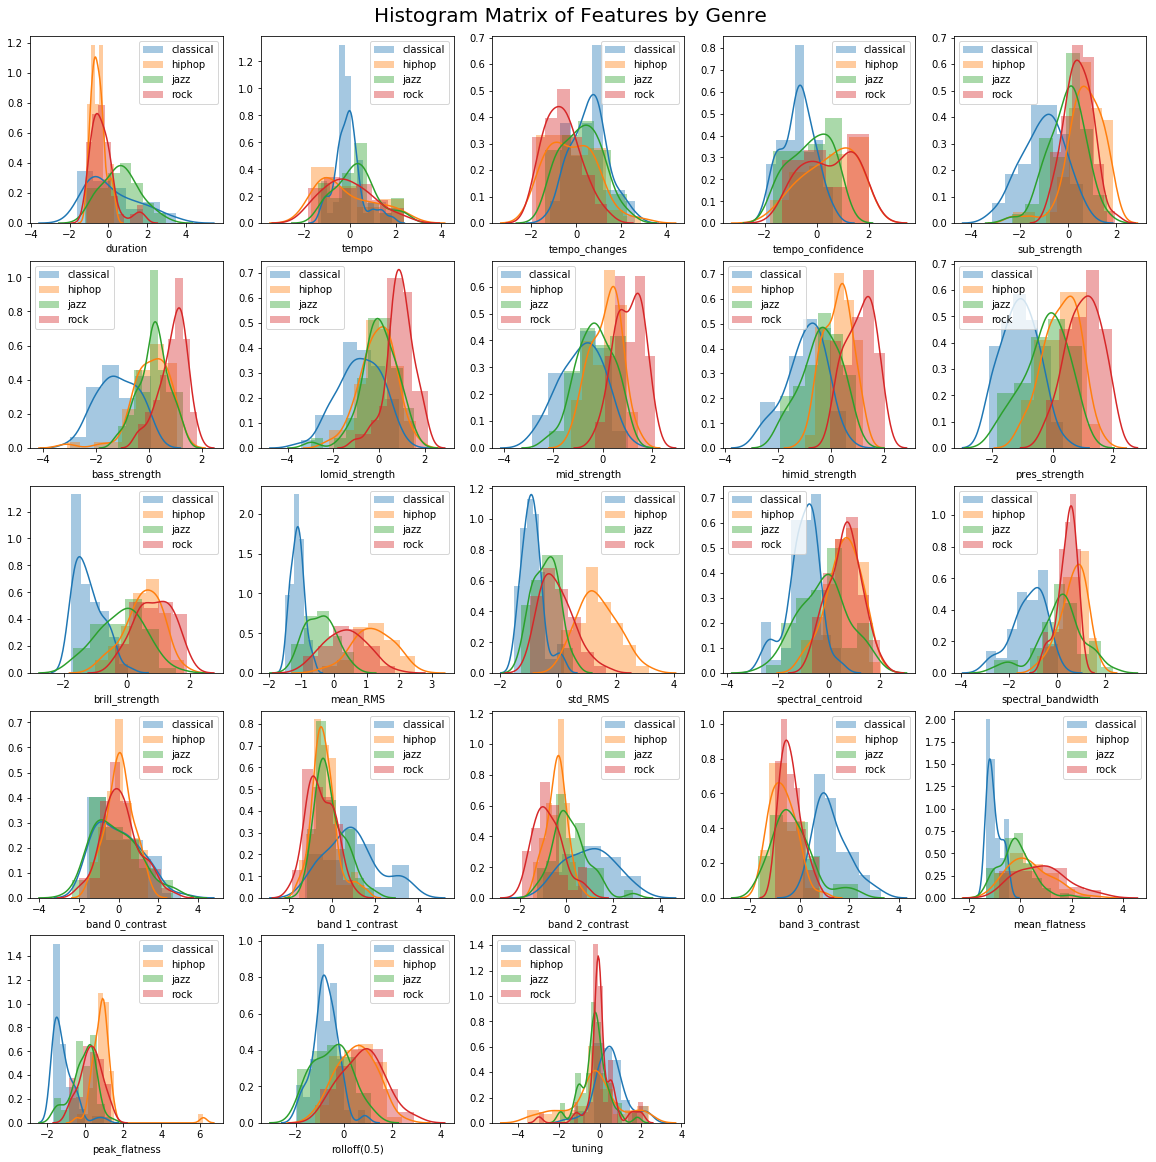

In [7]:
cols = songs_data_norm.columns

plt.figure(figsize=(20,20))
for n in range(len(cols)):
    plt.subplot(5,5,n+1)
    for i in pd.unique(songs['genre']):
        sns.distplot(songs_data_norm[cols[n]][songs['genre'] == i], label = i)
        plt.legend()
        
plt.suptitle('Histogram Matrix of Features by Genre', fontsize = 20, y = .9)

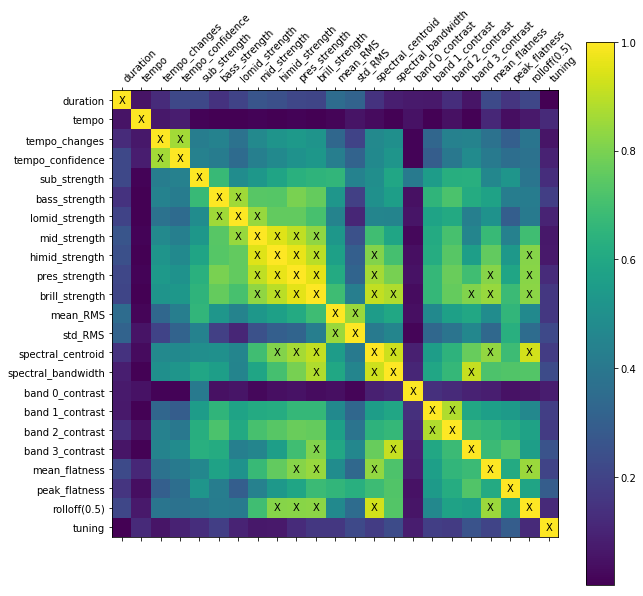

In [8]:
songs_corr = songs_data_norm.corr()
songs_corr_abs = np.abs(songs_corr)
corr8 = songs_corr_abs > 0.8

fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(songs_corr_abs)
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols, ha='left')
ax.set_yticklabels(cols)
ax.tick_params('x', labelrotation = 45)
ax.figure.colorbar(im)

for i in range(len(cols)):
    for j in range(len(cols)):
        if songs_corr_abs.loc[cols[j],cols[i]] >0.8:
            text = ax.text(j, i,"X", ha="center", va="center", color="black")

In [9]:
corrdict = {}
for i in range(len(songs_corr.columns)):
    tuplist = []
    for j in range(len(songs_corr.index)):
        if songs_corr_abs.iloc[i,j] > 0.8 and i != j:
            tuplist.append((songs_corr.index[j], songs_corr.iloc[i,j]))
            corrdict[songs_corr.columns[i]] = tuplist        
        
numcorr = {}
for i in corrdict:
    numcorr[i] = len(corrdict[i])
    
print('Correlates of each feature (> 0.8):\n')
pprint.pprint(corrdict)
print('\nNumber of correlates of each feature (> 0.8):\n')
pprint.pprint(numcorr)

Correlates of each feature (> 0.8):

{'band 1_contrast': [('band 2_contrast', 0.8798517029625254)],
 'band 2_contrast': [('band 1_contrast', 0.8798517029625254)],
 'band 3_contrast': [('brill_strength', -0.8096487668623021),
                     ('spectral_bandwidth', -0.912057350468911)],
 'bass_strength': [('lomid_strength', 0.8590674086611063)],
 'brill_strength': [('mid_strength', 0.834718623009624),
                    ('himid_strength', 0.8978415615008833),
                    ('pres_strength', 0.9586365227169235),
                    ('spectral_centroid', 0.9083561309406551),
                    ('spectral_bandwidth', 0.8815891782769385),
                    ('band 3_contrast', -0.8096487668623021),
                    ('mean_flatness', 0.8442569952904919),
                    ('rolloff(0.5)', 0.8273360215136213)],
 'himid_strength': [('mid_strength', 0.9530094059419538),
                    ('pres_strength', 0.9657425753178487),
                    ('brill_strength', 0.89784156

- `tempo_changes` and `tempo_condidence` are negatively correlated.  `tempo_condidence` appears to offer slightly more separation, so we will include that and drop `tempo_changes`.

- `bass_strength`, `lomid_strength`, and `mid_strength` are all correlated.  `bass strength` will be kept as it has no correlations to other variables.

- `himid_strength`, `pres_strength`, and `brill_strength` are all correlated, to numerous variables.  `pres_strength` will be included as its histogram shows the most segragation between groups.

- `mean_RMS` and `std_RMS` are both correlated, but their histograms show different segregations for the genres (`mean_RMS` has a nice peak for jazz, while `std_RMS` has a clear separation for hiphop), so I will try to keep both.

- `spectral_centroid` and `spectral_bandwidth` are correlated; the former will be dropped for its correlations with 5 other variables

- `band 1_contrast` and `band 2_contrast` are correlated; the former will be dropped because in the histogram the distributions of jazz, rock, and hiphop are nearly identical.

In [10]:
songs_norm_drop = songs_data_norm.drop(['tempo_changes','lomid_strength', 'mid_strength', 'himid_strength', 'brill_strength',
           'spectral_centroid', 'band 1_contrast'], axis=1)

In [11]:
labels = songs['genre']
features = songs_data_norm

print(labels.shape)
print(features.shape)

(200,)
(200, 23)


## Training the Model

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import (ShuffleSplit, StratifiedKFold, cross_val_score
                                     , GridSearchCV, cross_val_predict)

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# https://stackoverflow.com/questions/45150652/putting-together-sklearn-pipelinenested-cross-validation-for-knn-regression
#https://stackoverflow.com/questions/51629153/more-than-one-estimator-in-gridsearchcvsklearn
pipe = Pipeline(steps=[('select', SelectKBest()), ('estimator', SVC())])
params_grid = [{'select': [SelectKBest()],
                'select__k':[5,10,15],
                'estimator':[SVC()], 
                'estimator__C': [1, 10, 100, 1000],
                'estimator__gamma': [0.001, 0.0001]}, 
               {'select': [SelectKBest()],
                'select__k':[5,10,15],
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_depth': [1,2,3,4,5],
                'estimator__max_features': [None, "auto", "sqrt", "log2"]},
               {'select': [SelectKBest()],
                'select__k':[5,10,15],
                'estimator': [KNeighborsClassifier()],
                'estimator__n_neighbors': [2,3,4,5,6,7,8,9,10],}]
               # {'estimator':[Any_other_estimator_you_want],
               #  'estimator__valid_param_of_your_estimator':[valid_values]
    
            
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

clf = GridSearchCV(pipe, params_grid, cv = inner_cv)
models = clf.fit(features, labels)
cv_score = cross_val_score(models, features, labels, cv = outer_cv, scoring='accuracy')
predicts = cross_val_predict(models, features, labels, cv = outer_cv)

In [13]:
print("Best Estimator:")
print(models.best_estimator_)

Best Estimator:
Pipeline(memory=None,
     steps=[('select', SelectKBest(k=10, score_func=<function f_classif at 0x000001F27ED01400>)), ('estimator', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


## Evaluating Performance

In [14]:
print('\nAccuracy for the outer CV:\n' + str(cv_score) + "\n\nMean cv_score:\n" + str(cv_score.mean()))


Accuracy for the outer CV:
[0.8   0.875 0.95  0.725 0.925]

Mean cv_score:
0.8550000000000001


In [15]:
pd.DataFrame(models.best_estimator_.named_steps['estimator'].support_vectors_)

,0,1,2,3,4,5,6,7,8,9
0,0.018465,-2.376029,-2.615316,-2.113166,-1.756280,-1.161344,-1.134259,-2.744369,0.644705,-1.659728
1,-0.208573,0.315163,0.232034,-0.059041,-0.453099,-0.939335,-0.648561,-0.499462,0.783197,-0.438515
2,0.093572,0.334337,-0.184910,-0.419689,-0.468256,-0.975502,-0.564768,-0.617259,0.863660,-0.305917
3,-0.335986,0.158289,-0.165339,-0.262651,-0.444154,-0.970086,-0.687442,-0.761273,0.873682,1.014396
4,-0.152249,-0.235351,-0.300355,-0.410855,-0.697451,-1.115423,-0.763639,-0.860694,0.811128,0.597455
5,-0.951480,-2.607301,-2.671764,-2.121791,-1.757549,-1.327032,-1.315023,-2.364991,0.570805,-1.655039
6,-0.868140,-0.708828,-0.802849,-0.721263,-1.050990,-1.199017,-1.006311,-0.433528,0.709978,-0.857385
7,-0.446154,-0.353057,-0.483115,-0.646576,-0.852665,-1.065513,-0.640435,-0.752644,1.068534,-0.986181
8,-0.393872,-0.233678,-0.347389,-0.311621,-0.459250,-1.119132,-0.882492,-0.313934,0.128598,-0.738179
9,-1.265200,-0.760344,-0.921115,-1.071467,-1.201420,-0.656297,0.184225,-1.298139,1.443038,-1.254110


In [16]:
score_array = models.best_estimator_.named_steps['select'].scores_

In [17]:
score_dict = {}
for i in range(len(cols)):
    score_dict[cols[i]] = score_array[i]
    
print('Scores of each feature:')
pprint.pprint(score_dict)

print('\nSorted by score:')
# https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
for key, value in sorted(score_dict.items(), reverse=True, key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Scores of each feature:
{'band 0_contrast': 0.5096357617330562,
 'band 1_contrast': 30.682794923555704,
 'band 2_contrast': 52.836160611318014,
 'band 3_contrast': 91.19214241796763,
 'bass_strength': 86.67880546178472,
 'brill_strength': 114.90309182290171,
 'duration': 16.6224127234852,
 'himid_strength': 92.19508070014922,
 'lomid_strength': 41.17853790305035,
 'mean_RMS': 192.26825676311316,
 'mean_flatness': 59.001210049604275,
 'mid_strength': 65.2470717086147,
 'peak_flatness': 82.7403227404596,
 'pres_strength': 102.54380801079826,
 'rolloff(0.5)': 49.143737202642974,
 'spectral_bandwidth': 70.78344969795172,
 'spectral_centroid': 54.67203893781982,
 'std_RMS': 170.24131896563824,
 'sub_strength': 50.625767207678216,
 'tempo': 1.992386930079377,
 'tempo_changes': 17.27485126510948,
 'tempo_confidence': 22.79172075195869,
 'tuning': 8.322294676824763}

Sorted by score:
mean_RMS: 192.26825676311316
std_RMS: 170.24131896563824
brill_strength: 114.90309182290171
pres_strength: 102.

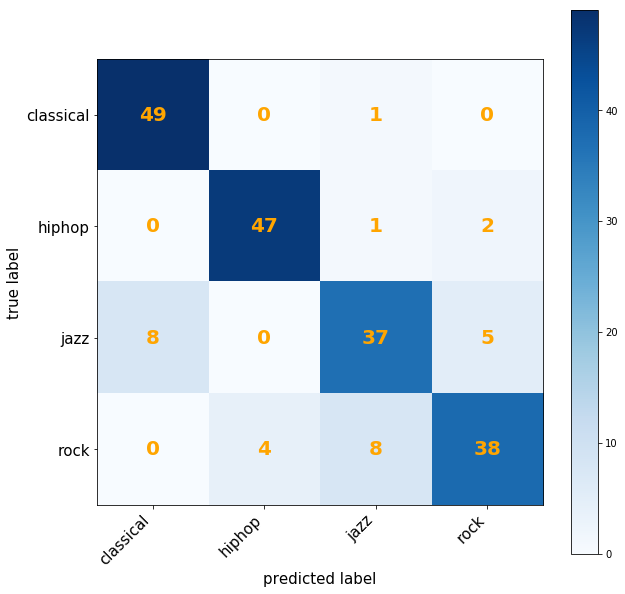

In [18]:
from sklearn.metrics import confusion_matrix

labelnames = pd.unique(labels)
confmat = confusion_matrix(labels, predicts, pd.unique(labels))

fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(confmat, cmap ='Blues')
ax.set_xticks(np.arange(len(labelnames)))
ax.set_yticks(np.arange(len(labelnames)))
ax.set_xticklabels(labelnames, ha='right', fontsize=15)
plt.gca().xaxis.tick_bottom()
ax.set_yticklabels(labelnames, fontsize=15)
ax.tick_params('x', labelrotation = 45)
ax.figure.colorbar(im)
ax.set_xlabel("predicted label", fontsize = 15)
ax.set_ylabel("true label", fontsize = 15)

for i in range(len(labelnames)):
    for j in range(len(labelnames)):
        text = ax.text(i, j, confmat[j,i], ha="center", va="center", color="orange", fontsize = 20, fontweight = "bold")

In [26]:
from sklearn.manifold import TSNE

tsne = pd.DataFrame(TSNE().fit_transform(X = features))
tsne[songs['genre'] == 'classical']

,0,1
0,7.150145,-13.751169
1,5.799681,-11.399889
2,10.153197,-11.698155
3,2.224307,-11.200896
4,0.243921,-6.490794
5,4.841971,-10.435916
6,2.559364,-4.160055
7,2.241227,-9.535686
8,8.605019,-8.858446
9,2.797440,-4.745537


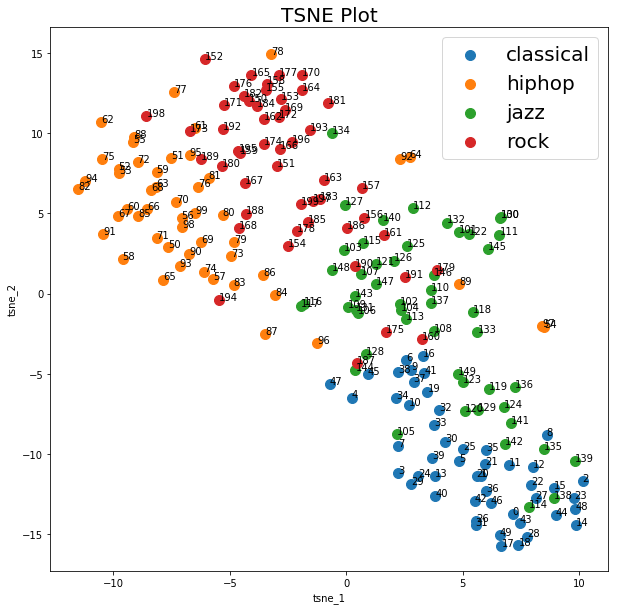

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
for i in pd.unique(labels):
    ax.scatter(tsne[songs['genre'] == i][0], tsne[songs['genre'] == i][1], label = i, s = 100)
    
for i in range(len(tsne)):
        plt.text(tsne[0][i], tsne[1][i], str(i), fontsize = 10)
plt.title("TSNE Plot", fontsize = 20)
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.legend(fontsize = 20)

In [21]:
def returnsong(x):
    return songs['song'][x]

returnsong(4)

'2-21 Symphonies de Fanfares_ Rondeau.wav'

In [22]:
for i in range(len(songs['song'])):
    print(str(i), ' ',songs['song'][i])

0   2-18 Adagio In G Minor.wav
1   1-22 Symphony No. 94 In G Major, Hob.wav
2   2-47 3 Gymnopédies_ Gymnopedie No.3.wav
3   1-48 Symphony No. 5 In C Sharp Minor.wav
4   2-21 Symphonies de Fanfares_ Rondeau.wav
5   2-28 Symphonie Espagnole In D Minor.wav
6   2-34 Sylvia_ Procession of Bacchus.wav
7   2-46 The Sorcerer's Apprentice.wav
8   1-12 Solomon, HWV 67 (arr. for Organ.wav
9   2-02 Slavonic Dances, Op. 46, No.8 I.wav
10   2-41 The Snow Maiden (_Snegurochka_).wav
11   1-49 Romeo and Juliet, Suite No. 2 f.wav
12   1-50 Rhapsody On a Theme By Paganini.wav
13   1-42 Prelude a L'apres-Midi D'un Fau.wav
14   2-43 Requiem_ Pie Jesu.wav
15   1-30 Piano Sonata No. 2 In B Flat Mi.wav
16   2-37 Pictures At an Exhibition (Arr..wav
17   2-16 Music for the Funeral of Queen.wav
18   2-17 Oboe Concerto In D Minor_ II. A.wav
19   1-35 Marche Slave In B Flat Major, O.wav
20   2-07 Magnificat.wav
21   2-39 Lyric Suite, Op. 54_ III. Nottu.wav
22   2-49 Liebesfreud.wav
23   1-31 Kinderszenen (Scenes f

## The Final Model!

In [23]:
final_model = Pipeline(steps=[('select', SelectKBest(k=10)), ('estimator', SVC(C=1000, gamma=0.001))])

fnl = final_model.fit(features, labels)
fnl_predicts = fnl.predict(features)